# Forbes Hong Kong Richest 50

https://www.forbes.com/lists/hong-kong-billionaires/?sh=4d106b616495

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2022

url = 'http://www.forbes.com/ajax/list/data'

parameter = {'type': 'person', 'year': year, 'uri': 'hong-kong-billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
Rank = []
Name = []
Worth = []
Industry = []


for i in range(50):
  Rank.append(r.json()[i]['rank'])
  Name.append(r.json()[i]['name'])
  Worth.append(r.json()[i]['worth']) 
  Industry.append(r.json()[i]['industry'])

# Create Dataframe

In [5]:
data = {
  'Rank': Rank,
  'Name': Name,
  'NetWorth': Worth,
  'Industry': Industry
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df.head()

,Rank,Name,NetWorth,Industry
0,1,Li Ka-shing,36000.0,Diversified
1,2,Lee Shau Kee,34200.0,Real Estate
2,3,Henry Cheng,26400.0,Diversified
3,4,Lee siblings,18900.0,Food & Beverage
4,5,Peter Woo,18700.0,Real Estate


In [7]:
df.tail()

,Rank,Name,NetWorth,Industry
45,46,Lawrence Ho,1250.0,Gambling & Casinos
46,47,Allan Wong,1200.0,Manufacturing
47,48,Pollyanna Chu,1150.0,Finance & Investments
48,49,Roy Chi Ping Chung,1100.0,Manufacturing
49,50,Kenneth Lo,955.0,Finance & Investments


In [8]:
df.shape

(50, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      50 non-null     int64  
 1   Name      50 non-null     object 
 2   NetWorth  50 non-null     float64
 3   Industry  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [10]:
df['Rank'] = df['Rank'].astype('category')                      # change rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
                  46, 47, 48, 49, 50],
, ordered=False)

In [11]:
df.describe(include='object')

,Name,Industry
count,50,50
unique,50,11
top,Li Ka-shing,Real Estate
freq,1,20


In [12]:
df.drop(columns=['Rank']).describe(exclude='object')

,NetWorth
count,50.000000
mean,6557.300000
std,7845.774842
min,955.000000
25%,2012.500000
50%,3750.000000
75%,7125.000000
max,36000.000000


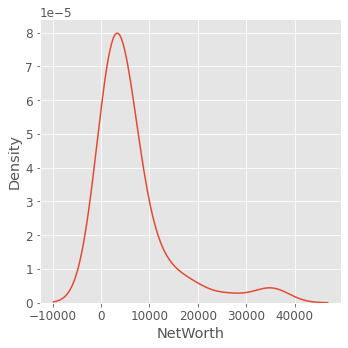

In [13]:
sns.displot(df, x='NetWorth', kind='kde', bw_adjust=1)

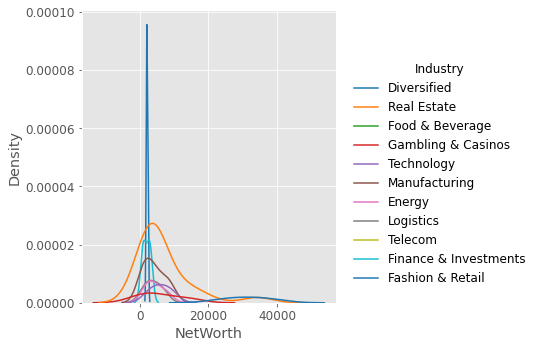

In [14]:
sns.displot(df, x='NetWorth', kind='kde', bw_adjust=1, hue='Industry', palette='tab10')

In [15]:
df['Industry'].value_counts()

Real Estate              20
Manufacturing             7
Finance & Investments     4
Gambling & Casinos        3
Technology                3
Energy                    3
Logistics                 3
Fashion & Retail          3
Diversified               2
Food & Beverage           1
Telecom                   1
Name: Industry, dtype: int64

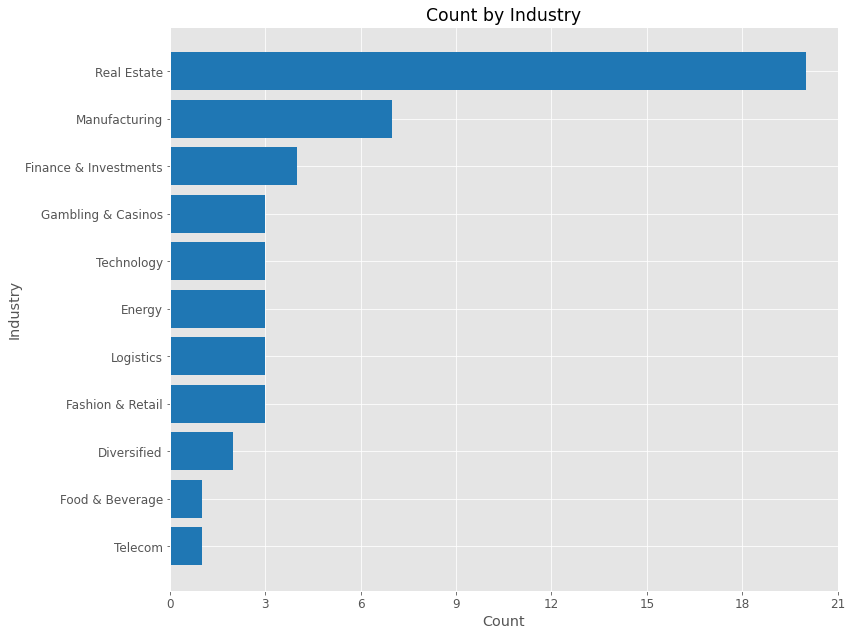

In [16]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Industry'].value_counts().keys(), width=df['Industry'].value_counts().values, color='tab:blue', align='center')
ax.set(title='Count by Industry', xlabel='Count', ylabel='Industry')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [17]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

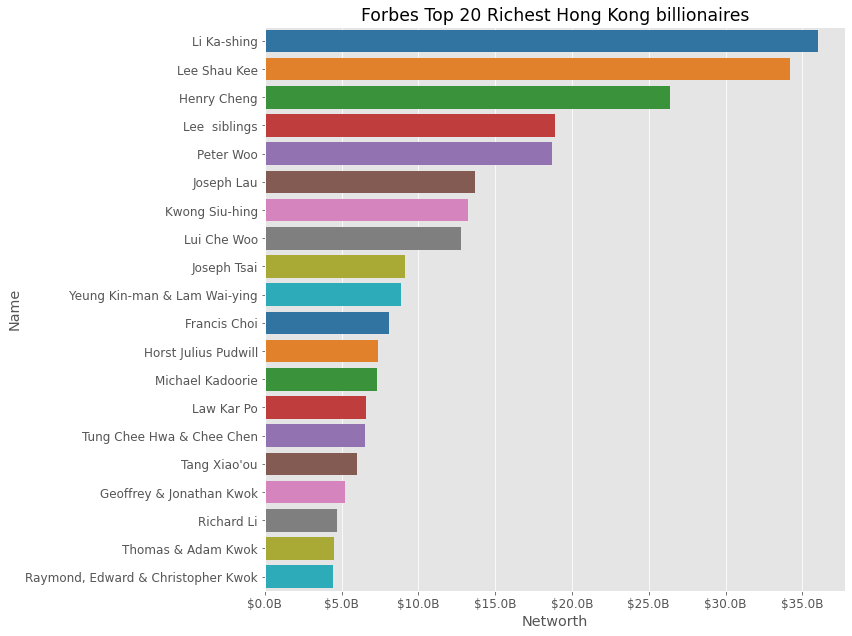

In [18]:
fig, ax = plt.subplots()
sns.barplot(
  data=df[:20],
  x='NetWorth', y='Name',
  palette='tab10')

ax.set(title='Forbes Top 20 Richest Hong Kong billionaires', xlabel='Networth', ylabel='Name')
ax.xaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [19]:
df.groupby('Industry')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=False)

,NetWorth
Industry,
Real Estate,138610.0
Diversified,62400.0
Manufacturing,28800.0
Food & Beverage,18900.0
Technology,18100.0
Gambling & Casinos,17450.0
Energy,12950.0
Logistics,11600.0
Finance & Investments,7905.0


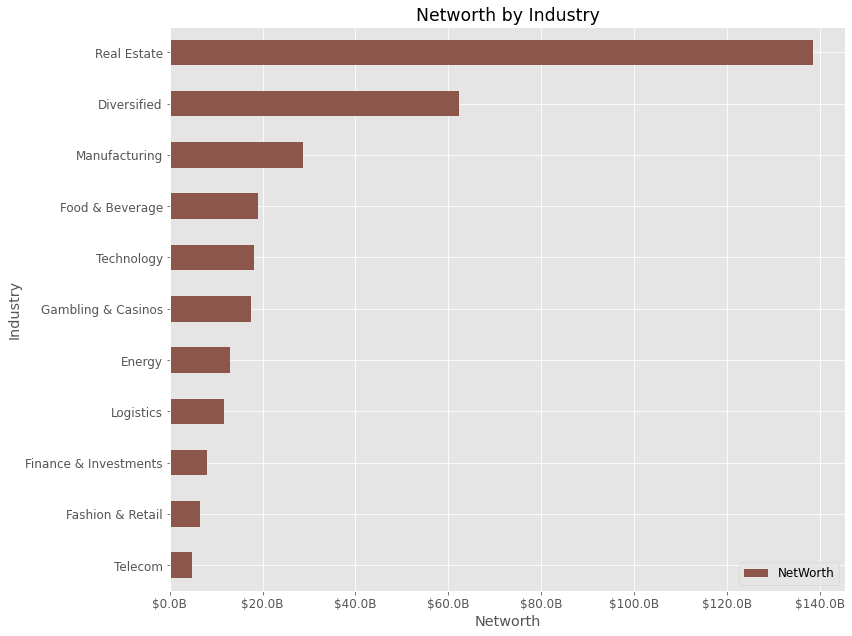

In [20]:
ax = df.groupby('Industry')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=True)\
  .plot(kind='barh', color='tab:brown')

ax.set(title='Networth by Industry', xlabel='Networth', ylabel='Industry')
ax.xaxis.set_major_formatter(format_bill)